# **Neural Network & Deep Learning**  
**Lab 1: Logic gates using a Single Layer Perceptron**  

*Kalpana N*   
*2347229*

**1. AND Gate Classification**

**1. Perceptron Model:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class Perceptron:
    def __init__(self, input_size, lr=0.1):
        self.weights = np.zeros(input_size + 1)  # Adding 1 for bias
        self.lr = lr

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]  # bias term
        return self.activation(summation)

    def train(self, X, y, epochs=10):
        for _ in range(epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                self.weights[1:] += self.lr * (label - prediction) * inputs
                self.weights[0] += self.lr * (label - prediction)  # update bias

    def plot_decision_boundary_3d(self, X, y, gate_name):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Scatter plot
        ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='bwr', marker='o', edgecolors='k')

        # Creating a grid
        x_range = np.linspace(-0.5, 1.5, 10)
        y_range = np.linspace(-0.5, 1.5, 10)
        x_grid, y_grid = np.meshgrid(x_range, y_range)
        z_grid = np.array([self.predict(np.array([i, j])) for i, j in zip(x_grid.ravel(), y_grid.ravel())])
        z_grid = z_grid.reshape(x_grid.shape)

        # Plot decision boundary
        ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.3, cmap='bwr', edgecolor='k')

        ax.set_title(f"{gate_name} Gate Decision Boundary")
        ax.set_xlabel("Input 1")
        ax.set_ylabel("Input 2")
        ax.set_zlabel("Output")
        plt.show()

**2. Create Dataset:**

In [ ]:
# AND gate
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])  # Expected outputs for AND gate



**3.Training the Perceptron:**

In [ ]:

and_perceptron = Perceptron(input_size=2)
and_perceptron.train(X_and, y_and, epochs=10)



**4.Test the Model:**

AND Gate:
[0 0] => 0
[0 1] => 0
[1 0] => 0
[1 1] => 1


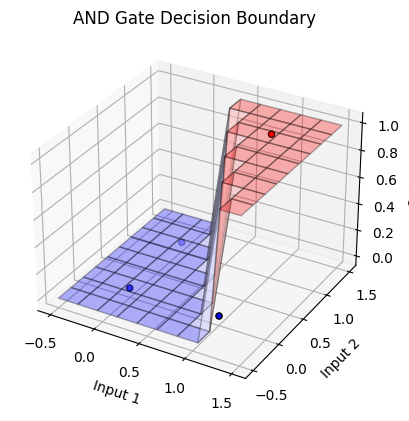

In [ ]:
print("AND Gate:")
for inputs in X_and:
    print(f"{inputs} => {and_perceptron.predict(inputs)}")
and_perceptron.plot_decision_boundary_3d(X_and, y_and, "AND")

**Questions:**     

**1.How do the weights and bias values change during training for the AND gate?**    
The weights and bias values change during training according to the gradient of the loss function. After enough training, the perceptron should be able to correctly classify all the AND gate inputs.

**2.Can the perceptron successfully learn the AND logic with a linear decision boundary?**   
Yes, the perceptron can successfully learn the AND logic since the AND gate is linearly separable.

**2. OR Gate Classification**  

**1.Create Dataset:**

In [ ]:
# OR gate
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])  # Expected outputs for OR gate

**2.Train the Perceptron:**

In [ ]:
or_perceptron = Perceptron(input_size=2)
or_perceptron.train(X_or, y_or, epochs=10)

**3.Test the Model:**

OR Gate:
[0 0] => 0
[0 1] => 1
[1 0] => 1
[1 1] => 1


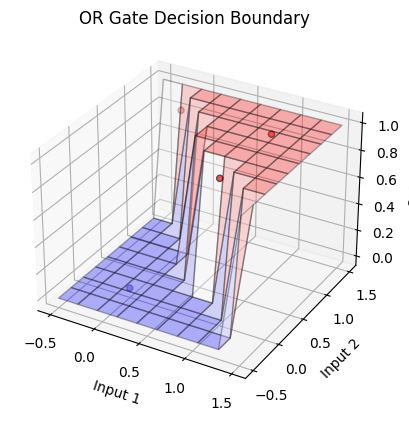

In [ ]:
print("OR Gate:")
for inputs in X_or:
    print(f"{inputs} => {or_perceptron.predict(inputs)}")
or_perceptron.plot_decision_boundary_3d(X_or, y_or, "OR")


**Questions:**   
**1.What changes in the perceptron's weights are necessary to represent the OR gate logic?**   
The weights for the OR gate need to shift toward positive values for input combinations where at least one input is 1.

**2.How does the linear decision boundary look for the OR gate classification?**  
The linear decision boundary separates inputs where at least one is 1 from the 0, 0 input.

**3. AND-NOT Gate Classification**

**1.Create Dataset:**

In [ ]:
# AND-NOT gate
X_and_not = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and_not = np.array([0, 0, 1, 0])  # 1 if first input is 1 and second input is 0

**2.Train the Perceptron:**

In [ ]:
and_not_perceptron = Perceptron(input_size=2)
and_not_perceptron.train(X_and_not, y_and_not, epochs=10)


**3.Test the Model:**

AND-NOT Gate:
[0 0] => 0
[0 1] => 0
[1 0] => 1
[1 1] => 0


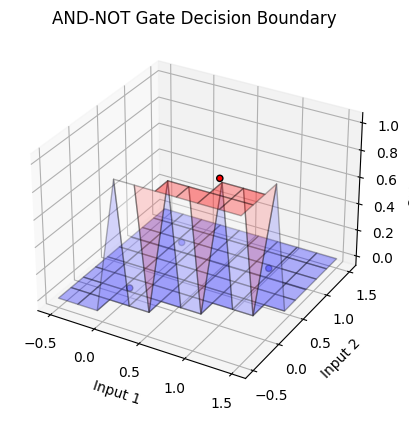

In [ ]:
print("AND-NOT Gate:")
for inputs in X_and_not:
    print(f"{inputs} => {and_not_perceptron.predict(inputs)}")
and_not_perceptron.plot_decision_boundary_3d(X_and_not, y_and_not, "AND-NOT")

**Questions:**   
**1.What is the perceptron's weight configuration after training for the AND-NOT gate?**  
The weights for the AND-NOT gate will become positive for input [1, 0] and negative for the other inputs after training.

**How does the perceptron handle cases where both inputs are 1 or 0?**  
The perceptron outputs 0 when both inputs are 1, effectively capturing the AND-NOT behavior.


**4. XOR Gate Classification**

**1.Create Dataset:**

In [ ]:
# XOR gate
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])  # Expected outputs for XOR gate

**2.Train the Perceptron:**

In [ ]:
xor_perceptron = Perceptron(input_size=2)
xor_perceptron.train(X_xor, y_xor, epochs=10)

**3.Test the Model:**

XOR Gate:
[0 0] => 1
[0 1] => 1
[1 0] => 0
[1 1] => 0


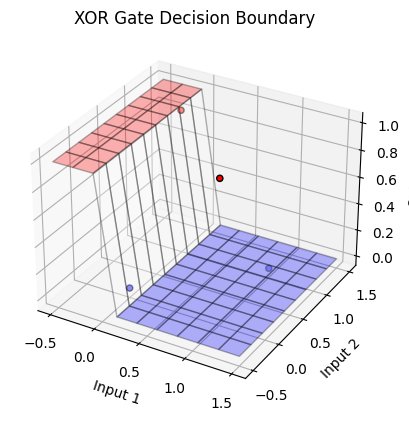

In [ ]:
print("XOR Gate:")
for inputs in X_xor:
    print(f"{inputs} => {xor_perceptron.predict(inputs)}")
xor_perceptron.plot_decision_boundary_3d(X_xor, y_xor, "XOR")

**Questions:**   
**Why does the Single Layer Perceptron struggle to classify the XOR gate?**  
The Single Layer Perceptron cannot successfully classify XOR since XOR is not linearly separable.    
**What modifications can be made to the neural network model to handle the XOR gate correctly?**  
To handle XOR correctly, you need to modify the model to include multiple layers (i.e., use a Multi-Layer Perceptron or a neural network with a hidden layer).

**XOR Using Multi Layer Perceptron**

In [ ]:
import numpy as np

class MLP:
    def __init__(self):
        # Initialize weights randomly
        self.input_size = 2
        self.hidden_size = 2
        self.output_size = 1
        self.lr = 0.1

        # Weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size)  # Weights for input to hidden layer
        self.b1 = np.zeros((1, self.hidden_size))  # Biases for hidden layer
        self.W2 = np.random.randn(self.hidden_size, self.output_size)  # Weights for hidden to output layer
        self.b2 = np.zeros((1, self.output_size))  # Biases for output layer

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        output_error = y - output
        output_delta = output_error * self.sigmoid_derivative(output)

        a1_error = output_delta.dot(self.W2.T)
        a1_delta = a1_error * self.sigmoid_derivative(self.a1)

        self.W2 += self.a1.T.dot(output_delta) * self.lr
        self.b2 += np.sum(output_delta, axis=0, keepdims=True) * self.lr
        self.W1 += X.T.dot(a1_delta) * self.lr
        self.b1 += np.sum(a1_delta, axis=0, keepdims=True) * self.lr

    def train(self, X, y, epochs=10000):
        for _ in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        return self.forward(X)

# XOR gate dataset
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])

# Initialize and train the MLP
mlp = MLP()
mlp.train(X_xor, y_xor)

# Test the model
print("XOR Gate:")
for inputs in X_xor:
    print(f"{inputs} => {mlp.predict(inputs)}")


XOR Gate:
[0 0] => [[0.0843548]]
[0 1] => [[0.92159013]]
[1 0] => [[0.92248019]]
[1 1] => [[0.09537719]]
